In [ ]:
# Libraries Used 
import pandas as pd
import numpy as np 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import IntSlider as widgets

%matplotlib inline

## Data Collection and Cleaning

In [2]:
tickers = ['AMZN', 'AAPL', 'PFE', 'AZN', 'BABA', 'AGNC', 'BRK-B', 'BA', 'LUV', 'DAL', 'EADSY', 'XOM']
# weights = np.array([.3525, .1822, .0424, .0622, .2776, .0180, .0650])
# indices = ['^DJI', '^IXIC', '^GSPC'] 
my_data = pd.DataFrame()
for t in tickers:
    my_data[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

In [3]:
my_data = my_data.dropna()
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1478 entries, 2014-09-19 to 2020-08-03
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1478 non-null   float64
 1   AAPL    1478 non-null   float64
 2   PFE     1478 non-null   float64
 3   AZN     1478 non-null   float64
 4   BABA    1478 non-null   float64
 5   AGNC    1478 non-null   float64
 6   BRK-B   1478 non-null   float64
 7   BA      1478 non-null   float64
 8   LUV     1478 non-null   float64
 9   DAL     1478 non-null   float64
 10  EADSY   1478 non-null   float64
 11  XOM     1478 non-null   float64
dtypes: float64(12)
memory usage: 150.1 KB


In [4]:
sec_returns = np.log(my_data/my_data.shift(1))
sec_returns


sec_returns = sec_returns.dropna()
sec_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1477 entries, 2014-09-22 to 2020-08-03
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1477 non-null   float64
 1   AAPL    1477 non-null   float64
 2   PFE     1477 non-null   float64
 3   AZN     1477 non-null   float64
 4   BABA    1477 non-null   float64
 5   AGNC    1477 non-null   float64
 6   BRK-B   1477 non-null   float64
 7   BA      1477 non-null   float64
 8   LUV     1477 non-null   float64
 9   DAL     1477 non-null   float64
 10  EADSY   1477 non-null   float64
 11  XOM     1477 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


## Data Analysis

In [5]:
sec_returns

,AMZN,AAPL,PFE,AZN,BABA,AGNC,BRK-B,BA,LUV,DAL,EADSY,XOM
Date,,,,,,,,,,,,
2014-09-22,-0.020799,0.000990,-0.007263,-0.000669,-0.043537,-9.393660e-03,-0.009292,-0.005737,-0.011934,-0.018019,-0.003165,-0.005990
2014-09-23,-0.002685,0.015513,-0.004317,-0.048569,-0.030726,-3.602477e-03,-0.003453,-0.009610,-0.026407,-0.006609,-0.036156,-0.005297
2014-09-24,0.014053,-0.008709,0.008615,0.007424,0.038263,-3.614975e-03,0.008395,0.009377,0.031664,-0.001062,-0.000658,-0.002189
2014-09-25,-0.019320,-0.038879,-0.010947,-0.009394,-0.018386,4.523014e-04,-0.020648,-0.011262,-0.020304,-0.026912,0.009820,-0.016521
2014-09-26,0.003968,0.029002,-0.008710,0.013571,0.017171,2.637242e-07,0.011531,0.012117,0.007994,-0.003826,0.021271,0.012442
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-28,-0.018126,-0.016564,0.038667,-0.004606,-0.007241,-1.026407e-02,0.010252,0.003694,0.023818,0.017108,0.015226,-0.011870
2020-07-29,0.011005,0.018987,0.006132,0.005666,0.013560,1.463094e-02,0.011728,-0.028679,-0.015606,-0.008517,-0.013037,0.010962
2020-07-30,0.006031,0.012028,-0.003607,0.021829,0.001148,-2.200271e-03,-0.010801,-0.024760,-0.026456,-0.030796,0.027502,-0.050302


In [6]:
for t in tickers:

    
    print("")
    print("#",t)
    print("DAILY")
    print("Daily Return:", round(sec_returns[t].mean()*100, 4), "%")
    print("Daily Risk:", round(sec_returns[t].std()*100, 4), "%")

    print("")

    print("ANNUAL")
    mean_return = round((sec_returns[t].mean()*250)*100, 4)
    std_return = round((sec_returns[t].std()*250**.5)*100, 4)
    print("Annual Return:", mean_return, "%")
    print("Annual Risk:", std_return, "%")
    

    
    


# AMZN
DAILY
Daily Return: 0.1517 %
Daily Risk: 1.9142 %

ANNUAL
Annual Return: 37.913 %
Annual Risk: 30.2654 %

# AAPL
DAILY
Daily Return: 0.1054 %
Daily Risk: 1.7978 %

ANNUAL
Annual Return: 26.3442 %
Annual Risk: 28.4254 %

# PFE
DAILY
Daily Return: 0.0305 %
Daily Risk: 1.3426 %

ANNUAL
Annual Return: 7.6356 %
Annual Risk: 21.2278 %

# AZN
DAILY
Daily Return: 0.0476 %
Daily Risk: 1.5956 %

ANNUAL
Annual Return: 11.9084 %
Annual Risk: 25.2287 %

# BABA
DAILY
Daily Return: 0.0684 %
Daily Risk: 2.0609 %

ANNUAL
Annual Return: 17.103 %
Annual Risk: 32.5861 %

# AGNC
DAILY
Daily Return: 0.0149 %
Daily Risk: 1.5209 %

ANNUAL
Annual Return: 3.7258 %
Annual Risk: 24.0483 %

# BRK-B
DAILY
Daily Return: 0.0235 %
Daily Risk: 1.3028 %

ANNUAL
Annual Return: 5.8847 %
Annual Risk: 20.5996 %

# BA
DAILY
Daily Return: 0.0253 %
Daily Risk: 2.601 %

ANNUAL
Annual Return: 6.3256 %
Annual Risk: 41.1247 %

# LUV
DAILY
Daily Return: -0.0025 %
Daily Risk: 2.2531 %

ANNUAL
Annual Return: -0.6247 %
Annual 

In [7]:
sec_returns.idxmin() 

AMZN    2014-10-24
AAPL    2020-03-16
PFE     2020-03-16
AZN     2017-07-27
BABA    2015-01-29
AGNC    2020-03-12
BRK-B   2020-03-12
BA      2020-03-16
LUV     2020-03-12
DAL     2020-03-18
EADSY   2020-03-18
XOM     2020-03-09
dtype: datetime64[ns]

In [8]:
sec_returns.idxmax()

AMZN    2015-04-24
AAPL    2020-03-13
PFE     2020-03-13
AZN     2019-02-14
BABA    2017-06-08
AGNC    2020-03-25
BRK-B   2020-03-13
BA      2020-03-25
LUV     2020-03-13
DAL     2020-03-24
EADSY   2020-03-26
XOM     2020-03-24
dtype: datetime64[ns]

In [9]:
# Covariance 
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = sec_returns.cov()
return_cov

,AMZN,AAPL,PFE,AZN,BABA,AGNC,BRK-B,BA,LUV,DAL,EADSY,XOM
AMZN,0.000366,0.000184,0.000081,0.000086,0.000189,0.000052,0.000098,0.000144,0.000106,0.000112,0.000126,0.000093
AAPL,0.000184,0.000323,0.000101,0.000105,0.000173,0.000079,0.000137,0.000212,0.000153,0.000179,0.000170,0.000138
PFE,0.000081,0.000101,0.000180,0.000090,0.000076,0.000053,0.000099,0.000129,0.000102,0.000115,0.000108,0.000094
AZN,0.000086,0.000105,0.000090,0.000255,0.000089,0.000050,0.000076,0.000109,0.000089,0.000100,0.000123,0.000078
BABA,0.000189,0.000173,0.000076,0.000089,0.000425,0.000052,0.000103,0.000174,0.000136,0.000164,0.000171,0.000106
AGNC,0.000052,0.000079,0.000053,0.000050,0.000052,0.000231,0.000080,0.000210,0.000135,0.000191,0.000179,0.000110
BRK-B,0.000098,0.000137,0.000099,0.000076,0.000103,0.000080,0.000170,0.000204,0.000156,0.000190,0.000171,0.000145
BA,0.000144,0.000212,0.000129,0.000109,0.000174,0.000210,0.000204,0.000676,0.000326,0.000420,0.000378,0.000242
LUV,0.000106,0.000153,0.000102,0.000089,0.000136,0.000135,0.000156,0.000326,0.000508,0.000448,0.000256,0.000148
DAL,0.000112,0.000179,0.000115,0.000100,0.000164,0.000191,0.000190,0.000420,0.000448,0.000663,0.000344,0.000187


In [10]:
# Correlations
# Determines how close the relationship are between two stocks
return_corr = sec_returns.corr()
return_corr

,AMZN,AAPL,PFE,AZN,BABA,AGNC,BRK-B,BA,LUV,DAL,EADSY,XOM
AMZN,1.000000,0.533872,0.314260,0.281271,0.478961,0.176949,0.393259,0.289393,0.245018,0.227482,0.272337,0.295725
AAPL,0.533872,1.000000,0.419547,0.364598,0.466513,0.289734,0.586863,0.453943,0.377680,0.386687,0.391584,0.463245
PFE,0.314260,0.419547,1.000000,0.418292,0.273741,0.258505,0.563518,0.368407,0.336798,0.332415,0.331202,0.421830
AZN,0.281271,0.364598,0.418292,1.000000,0.271441,0.207335,0.365894,0.263463,0.248717,0.243132,0.318348,0.294693
BABA,0.478961,0.466513,0.273741,0.271441,1.000000,0.167278,0.385396,0.324014,0.293517,0.308751,0.341643,0.310546
AGNC,0.176949,0.289734,0.258505,0.207335,0.167278,1.000000,0.403516,0.532007,0.393740,0.487703,0.485490,0.438653
BRK-B,0.393259,0.586863,0.563518,0.365894,0.385396,0.403516,1.000000,0.601470,0.533092,0.564700,0.541669,0.673573
BA,0.289393,0.453943,0.368407,0.263463,0.324014,0.532007,0.601470,1.000000,0.556907,0.626383,0.599627,0.562410
LUV,0.245018,0.377680,0.336798,0.248717,0.293517,0.393740,0.533092,0.556907,1.000000,0.771448,0.468493,0.398417
DAL,0.227482,0.386687,0.332415,0.243132,0.308751,0.487703,0.564700,0.626383,0.771448,1.000000,0.551606,0.438904


## Data Visualization

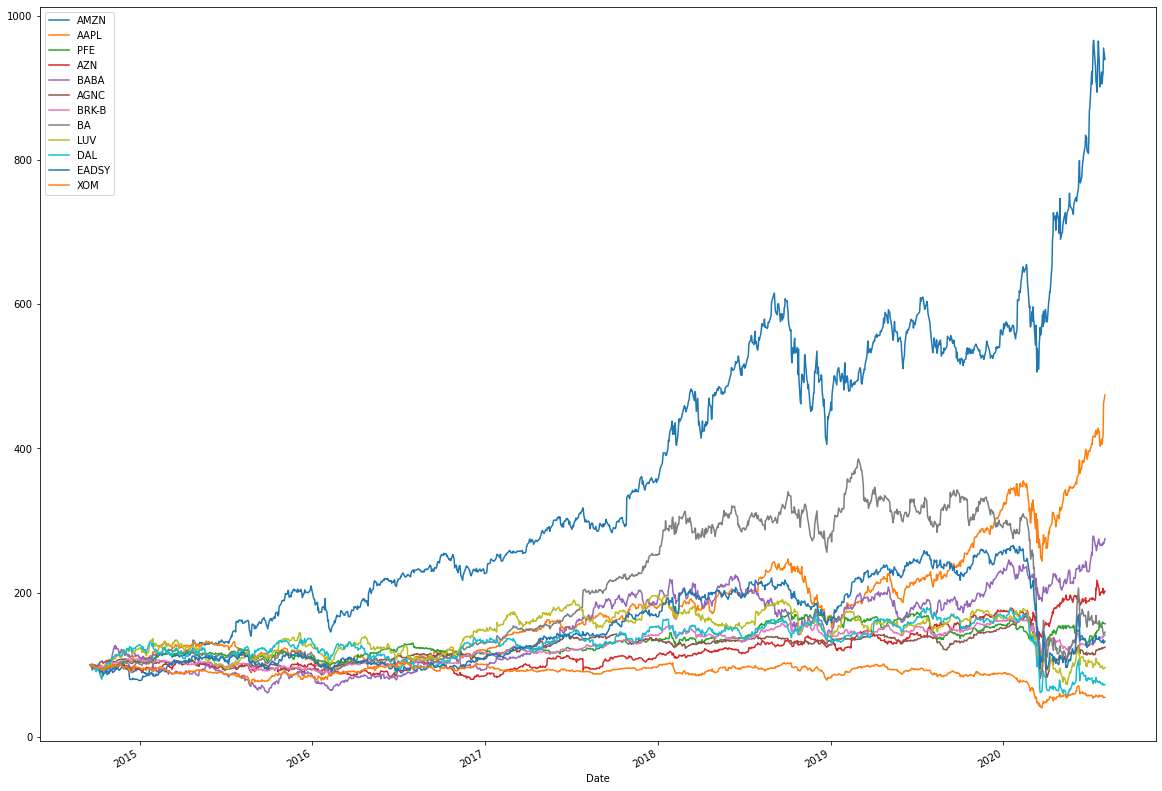

In [11]:
(my_data/my_data.iloc[0]*100).plot(figsize=(20,15))

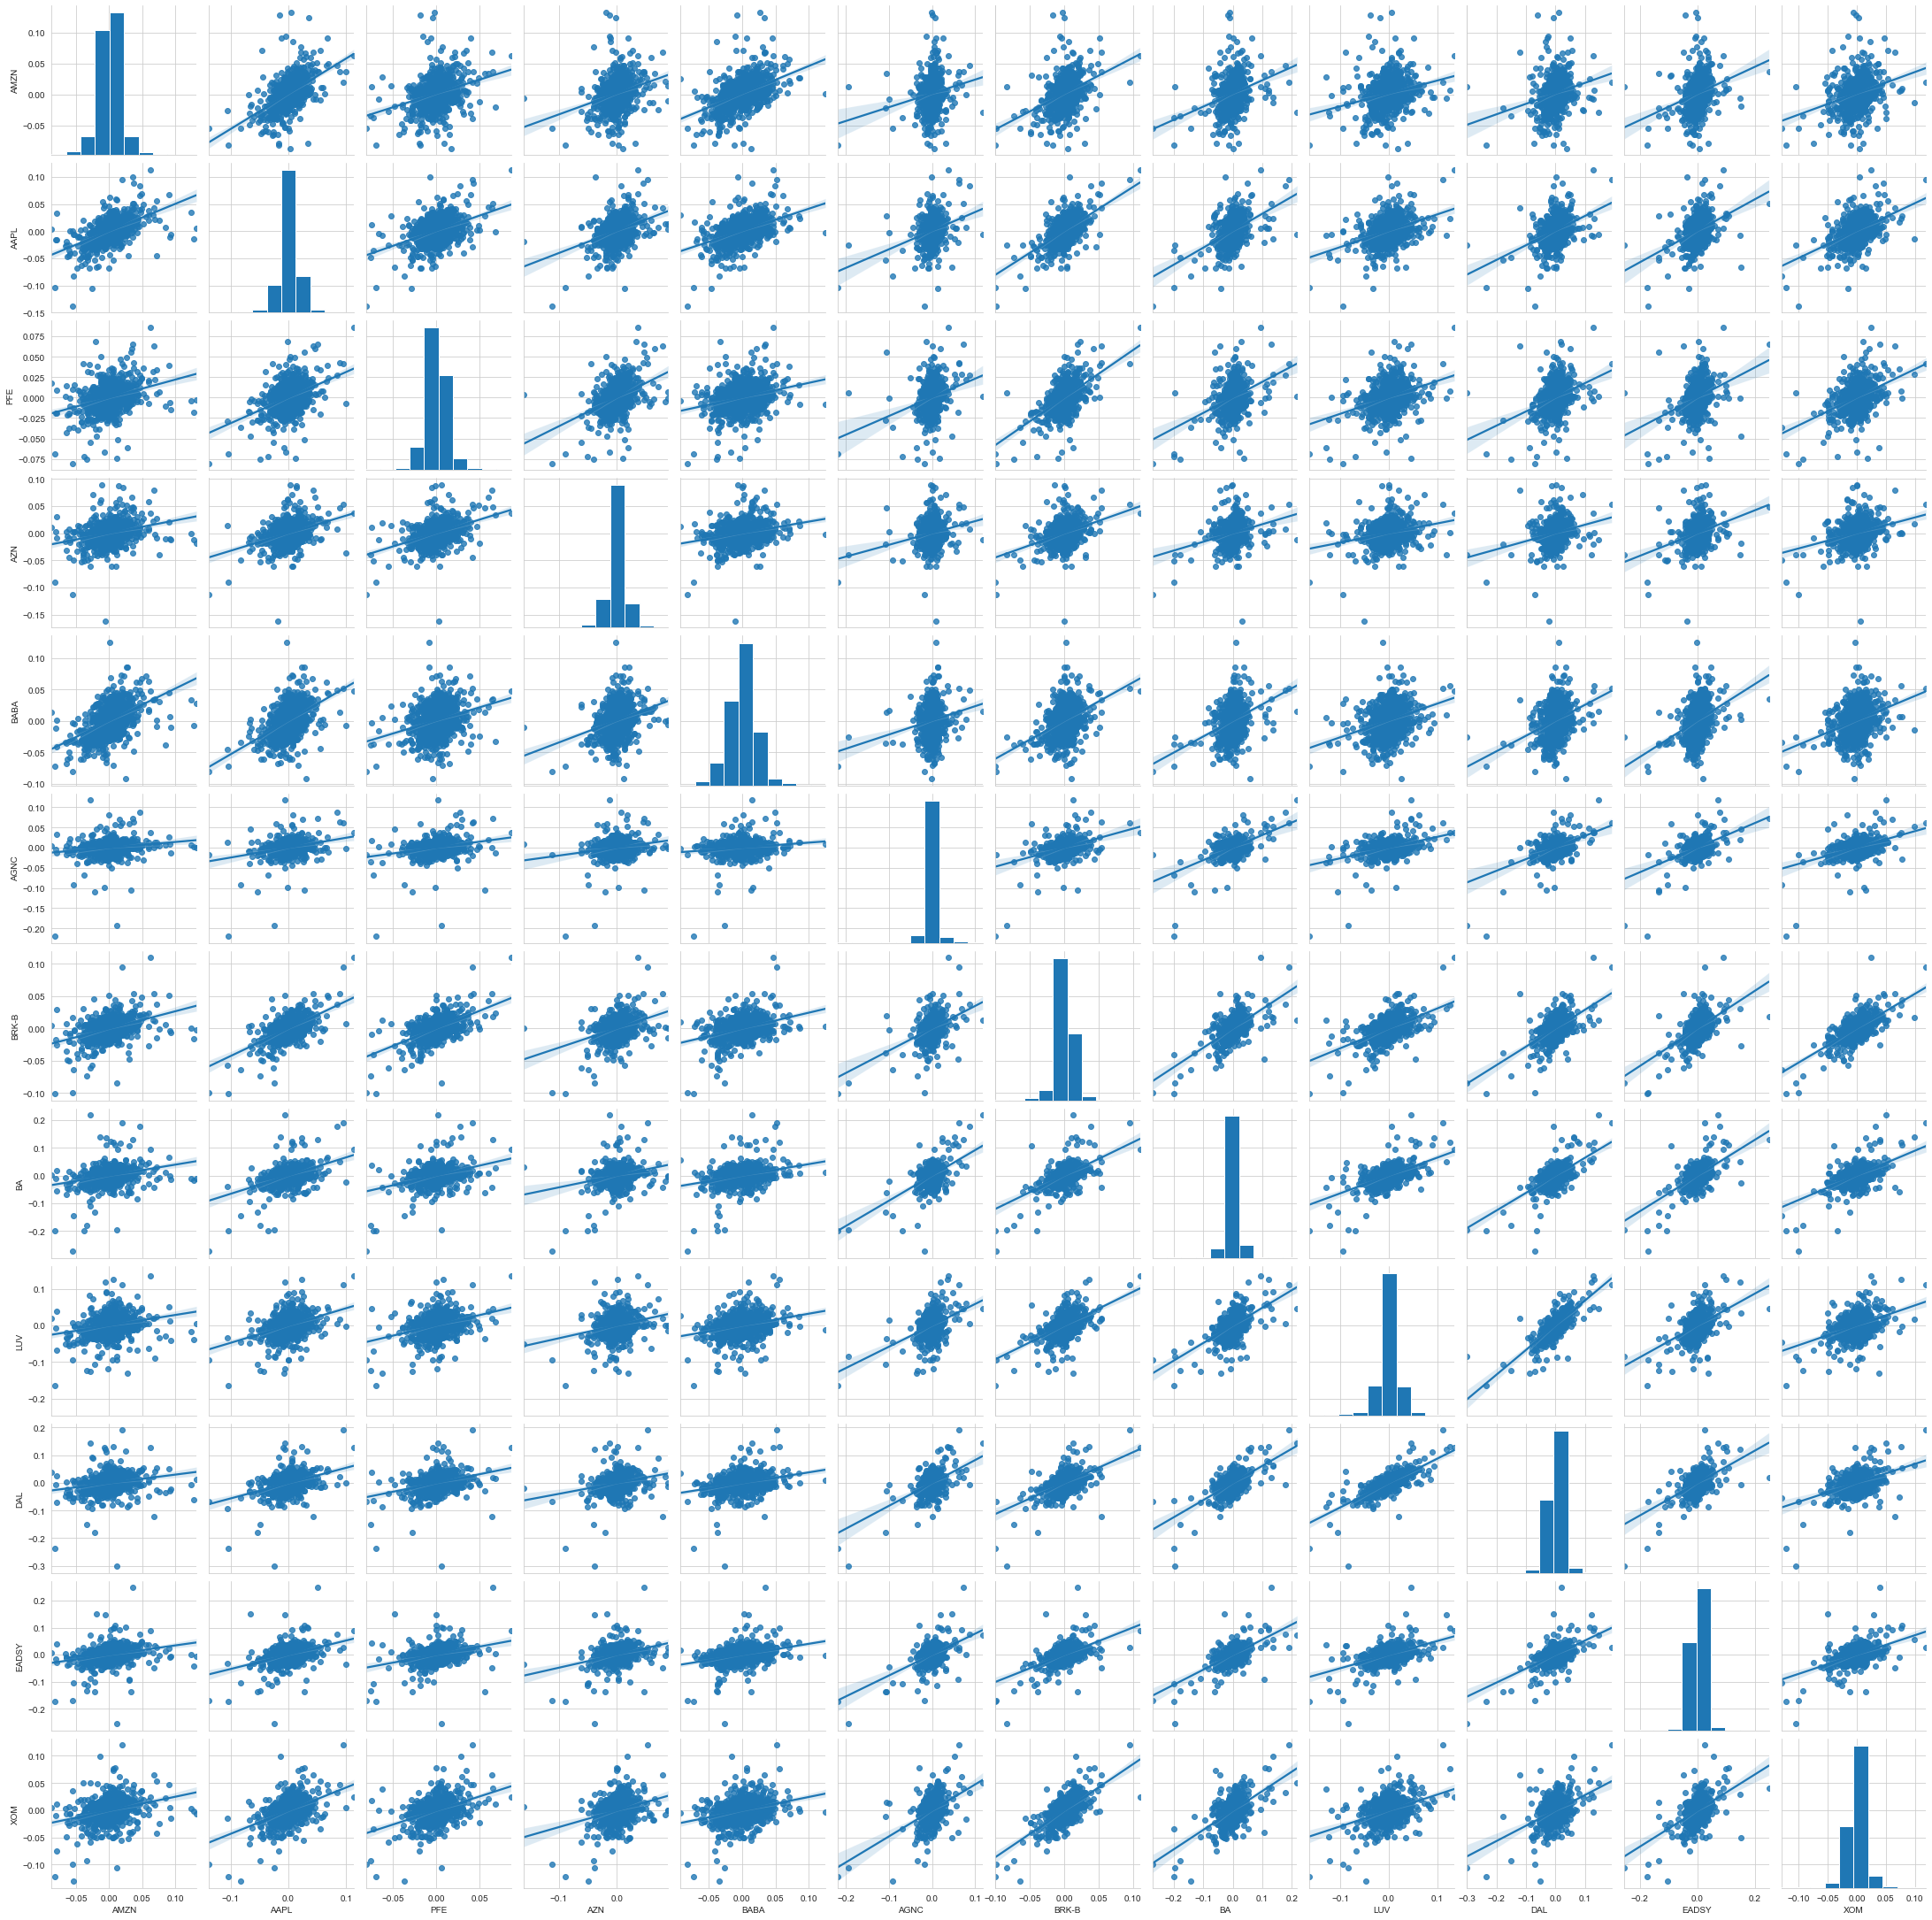

In [12]:
sns.set_style('whitegrid')
sns.pairplot(sec_returns[1:], kind="reg")

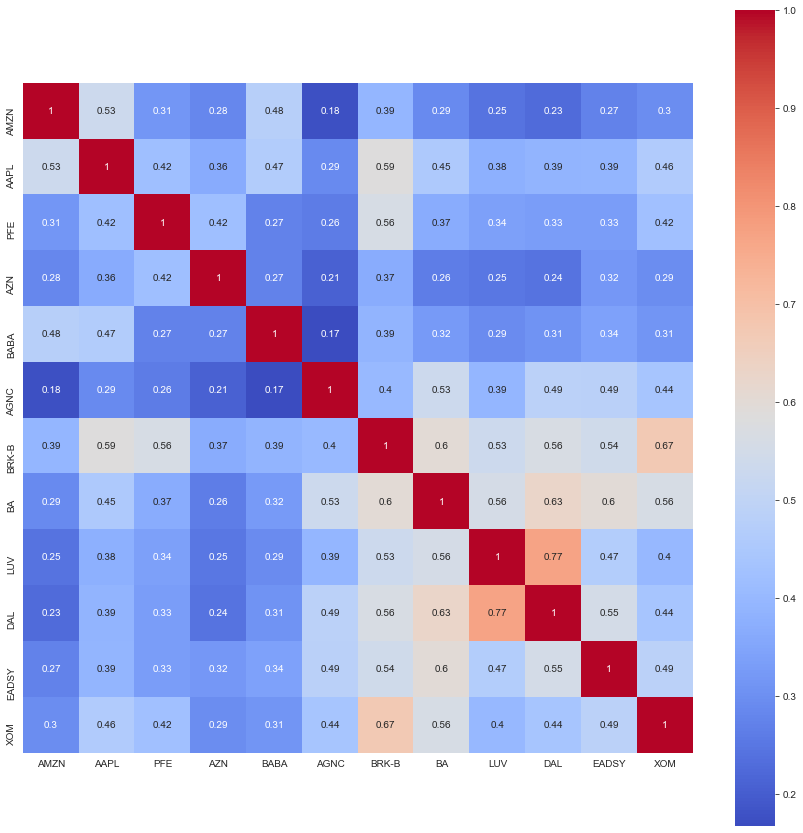

In [13]:
plt.subplots(figsize=(15, 15))
sns.heatmap(return_corr, annot=True, square=True, cmap='coolwarm')
#plt.show()